In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
file_path = '../Data/Week2_challenge_data_source.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path)

# Display basic info
display(data.head())
data.info()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [3]:
# Aggregate experience metrics per user
experience_metrics = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
}).reset_index()

# Handle missing values
experience_metrics.fillna(experience_metrics.mean(), inplace=True)

# Display the aggregated metrics
display(experience_metrics.head())


,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.360100e+10,1.685339e+07,624008.18488,46.000000,0.000000,37.0,39.0
1,3.360100e+10,1.685339e+07,624008.18488,30.000000,1.000000,48.0,51.0
2,3.360100e+10,1.685339e+07,624008.18488,119.182869,16.771129,48.0,49.0
3,3.360101e+10,1.066000e+03,624008.18488,69.000000,15.000000,204.0,44.0
4,3.360101e+10,9.349630e+06,21202.00000,57.000000,2.500000,20197.5,8224.5


In [4]:
# Top, bottom, and most frequent values
metrics = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
           'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

for metric in metrics:
    print(f"\nMetric: {metric}")
    print(f"Top 5:\n{experience_metrics[metric].nlargest(5)}")
    print(f"Bottom 5:\n{experience_metrics[metric].nsmallest(5)}")
    print(f"Most Frequent: {experience_metrics[metric].mode()[0]}")



Metric: TCP DL Retrans. Vol (Bytes)
Top 5:
85785    4.289488e+09
32273    4.288060e+09
58026    4.268432e+09
31942    4.254644e+09
62049    4.211189e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 5:
56622    2.0
95322    2.0
71705    4.0
71778    4.0
87156    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent: 16853393.739320666

Metric: TCP UL Retrans. Vol (Bytes)
Top 5:
100005    2.455600e+09
57181     1.751384e+09
58664     1.727810e+09
70913     1.722862e+09
45158     7.948258e+08
Name: TCP UL Retrans. Vol (Bytes), dtype: float64
Bottom 5:
20111     1.0
67996     1.0
99193     1.0
104817    1.0
18026     2.0
Name: TCP UL Retrans. Vol (Bytes), dtype: float64
Most Frequent: 624008.1848803305

Metric: Avg RTT DL (ms)
Top 5:
47983    96923.0
80249    54847.0
41944    32333.0
93844    26971.0
1713     26250.0
Name: Avg RTT DL (ms), dtype: float64
Bottom 5:
28878    0.0
40873    0.0
44748    0.0
66098    0.0
88903    0.0
Name: Avg RTT DL (ms), dtype: float

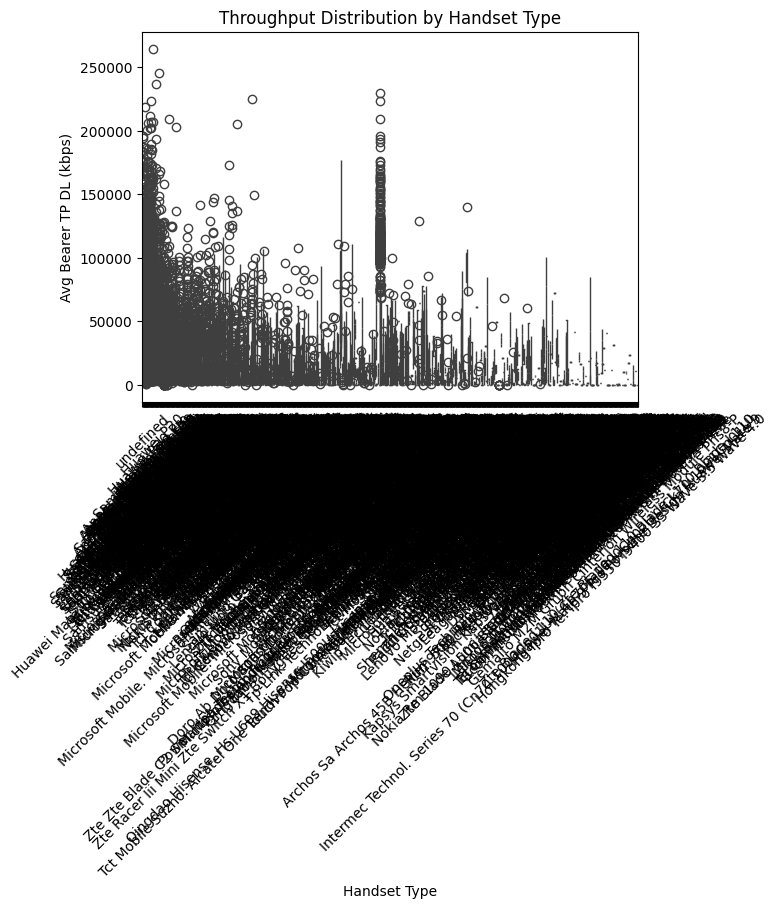

In [5]:
# Merge handset data with experience metrics
handset_data = data[['MSISDN/Number', 'Handset Type']].drop_duplicates()
experience_with_handset = pd.merge(experience_metrics, handset_data, on='MSISDN/Number', how='inner')

# Plot throughput distribution per handset type
sns.boxplot(data=experience_with_handset, x='Handset Type', y='Avg Bearer TP DL (kbps)')
plt.title('Throughput Distribution by Handset Type')
plt.xticks(rotation=45)
plt.ylabel('Avg Bearer TP DL (kbps)')
plt.show()


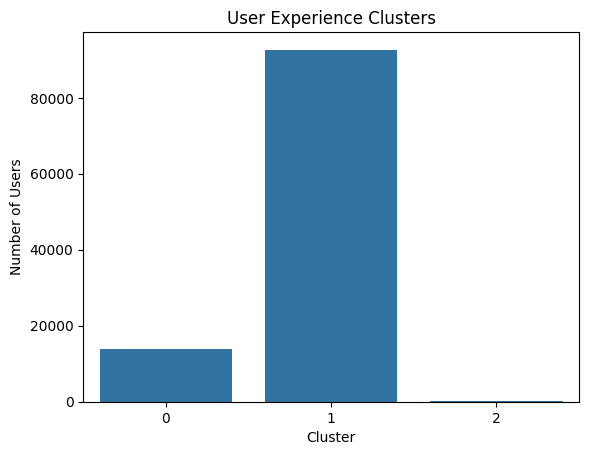

In [6]:
# Select relevant columns for clustering
clustering_data = experience_metrics[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                                       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Perform k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrics['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize cluster distribution
sns.countplot(x=experience_metrics['Cluster'])
plt.title('User Experience Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()
